In [8]:
%load_ext autoreload
%autoreload 2

# add the parent directory in the path to import the packages
import sys
sys.path.append('../')

import plotly.express as px
from WaterClassification.core import *
from WaterClassification.Radiometry import RadiometryDB, Radiometry

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GetDB - Database GETDB

> This notebook explains the utilization of the `RadiometryDB` responsible for opening and manipulating a Radiometry db <br>
> It also presents a brief Exploratory Data Analysis (EDA)

In [9]:
RadiometryDB?

Init signature: RadiometryDB(path, config=None)
Docstring:      Class responsible for loading the Radiometry Database and manipulating it.
Init docstring: Open the radiometry DB located in specified folder
File:           d:\onedrive - agência nacional de águas\projects\waterclassification\waterclassification\radiometry\radiometry.py
Type:           type
Subclasses:     


## Checking all data available in the database

In [10]:
db = RadiometryDB(r'D:\OneDrive - Agência Nacional de Águas\Data\GET-RadiometryDB')
db.summary()

SPM  POC  DOC  Chl-a  Granul  Kd
Area                                               
Madeira            185    0    0      2      66  38
Negro              159   51   63      1       1  10
Paranoa            113    0    0      0       0   0
Solimoes_Amazonas  105    0    0     16      25  47
Ucayali             55    0    0      0       2   2
Saut_Hermina        50    0    0      0       0   0
Solimoes_Varzea     47    0    0     30       0   8
Paranapanema        41    0    0      0       0   0
Purus               34    0    0      1      17   6
Maroni              32    0    0      0       0   0
Sao_Francisco       22    0    0      0       0   0
Bagre               21    0    0      0       0   0
Mekong              14    0    0      0       0   2
Paraopeba           14    0    0      0       0   0
Indaia              13    0    0      0       0   0
Descoberto           6    0    0      0       0   0
Oiapoque             5    0    0      0       0   0
Ica                  3    0    0      1       1   2
Japura               3    0    0      1       0   3
Jutai                3    0    0      0       1   3
Lago_Tefe            2    0    0      1       1   1
Javari               2    0    0      1       0   1
Tapajos              2    0    0      1       0   0
Maranon              2    0    0      0       2   1
Jurua                2    0    0      0       1   2
Napo                 2    0    0      0       1   1

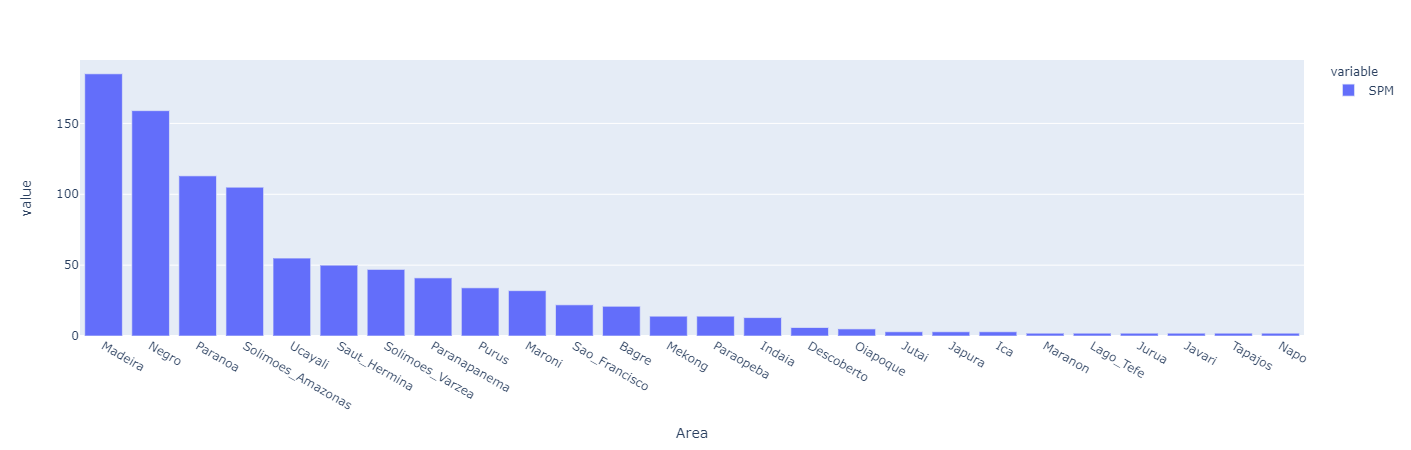

In [11]:
db.summary(plot=True, bars=['SPM'])

### Plotting other variables

In [12]:
db.summary?

Signature: db.summary(by='Area', plot=False, bars=None, **kwargs)
Docstring:
Create a summary DataFrame to present all data stored in the database
:param bars: The name of the bars to include in the plot.
This can be 'SPM', 'POC', 'DOC', 'Chl-a', 'Granul', 'Kd'
:param plot: Instead of returning a DataFrame, return a plotly bar fig
File:      d:\onedrive - agência nacional de águas\projects\waterclassification\waterclassification\radiometry\radiometry.py
Type:      method


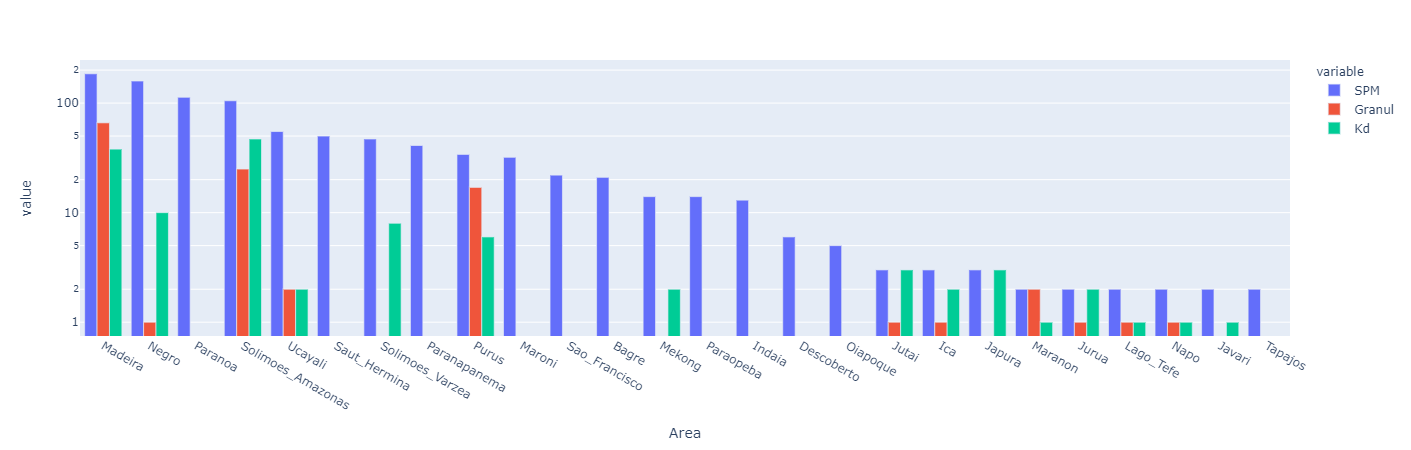

In [13]:
db.summary(plot=True, bars=['SPM', 'Granul', 'Kd'], log_y=True)

# Load individual radiometries

In [14]:
db.load_radiometry?

Signature:
db.load_radiometry(
    id=None,
    folder=None,
    area=None,
    station=None,
    measurement=None,
    load_interpolated=True,
    read_backup=False,
)
Docstring:
Load a specific radiometry from the database and returns a Radiometry class
The load radiometry function can work with either:
- database Id
- description: area, station and measurement ( in the format YYYYMMDD-hhmm)
- folder: if we know the folder (absolute or relative) of the measurement in the database
File:      d:\onedrive - agência nacional de águas\projects\waterclassification\waterclassification\radiometry\radiometry.py
Type:      method


In [15]:
# Here we present 4 different ways to open a specific radiometry

# loading with the description
rdmtry = db.load_radiometry(area="Madeira", station="Madeira_Foz", measurement="20091128-1640")
assert isinstance(rdmtry, Radiometry)

# loading with the Id
rdmtry = db.load_radiometry(id=958)
assert isinstance(rdmtry, Radiometry)

# loading with the absolute folder
rdmtry = db.load_radiometry(folder=r'D:\OneDrive - Agência Nacional de Águas\Data\GET-RadiometryDB\Madeira\Madeira_Foz\20091128-1640')
assert isinstance(rdmtry, Radiometry)

# loading with the relative folder
rdmtry = db.load_radiometry(folder=r'Madeira\Madeira_Foz\20091128-1640')
assert isinstance(rdmtry, Radiometry)

rdmtry

Class Radiometry with 4 radiances: ['Rrs', 'Ed', 'Lu', 'Ld'] 
Folder: D:\OneDrive - Agência Nacional de Águas\Data\GET-RadiometryDB\Madeira\Madeira_Foz\20091128-1640 
Date Range: ('2009-11-28 16:40:17', '2009-11-28 16:51:57') 
Subset: None

## Plotting the Graphs

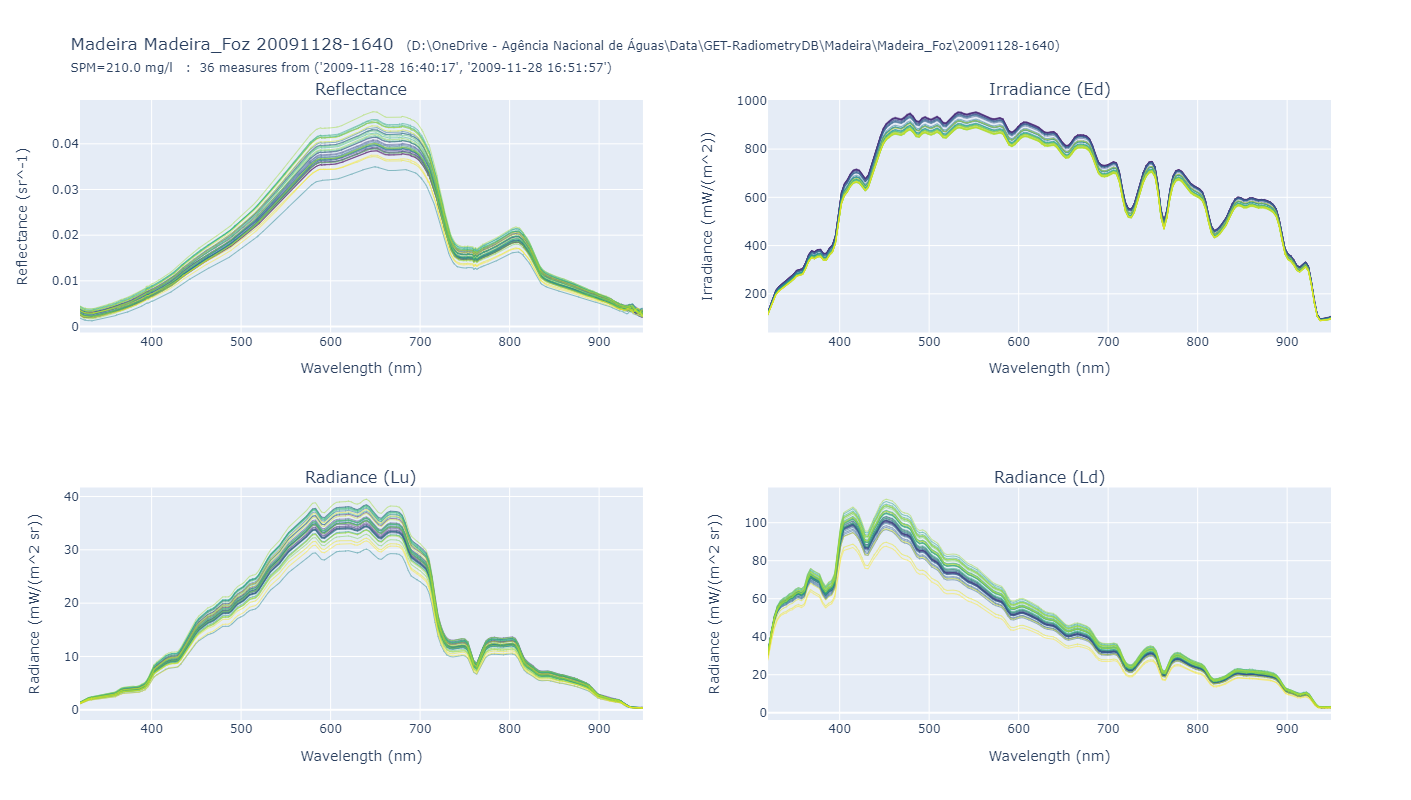

In [16]:
rdmtry.plot_radiometries()

# Loading Mean Radiometries from the Database
Instead of loading each individual set of radiometries for a specific measurement, it is possible to open the summarized radiometries from all measurements in the database.<br>
The load_summary function load the mean radiometries. The results will be stored in the `.rdmtries` attribute.<br>
<b>Note that the mean radiometries are pre-processed, so if the summary is not updated, one should run `db.create_summary_radiometries` function to reprocess it.</b>

## update mean radiometries

In [17]:
db.create_summary_radiometries?

Signature: db.create_summary_radiometries(r_types=None, attrs=None)
Docstring:
Create the files xxx summary.csv for the r_types indicated. These files are necessary to load
the mean radiometries of the database. The attributes will be stored in the final .csv
this function.
r_types are ['Rrs', 'Ed', 'Ld', 'Lu']
File:      d:\onedrive - agência nacional de águas\projects\waterclassification\waterclassification\radiometry\radiometry.py
Type:      method


In [18]:
# db.create_summary_radiometries()

## Loading Mean Radiometries
The load_summary function load the mean radiometries. The results will be stored in the .rdmtries attribute.

In [20]:
db.load_radiometries()

Radiometries ['Rrs', 'Ed', 'Ld', 'Lu'] loaded in dictionary .rdmtries


In [21]:
db.rdmtries['Rrs'].head()

Area_2 Station_2    Measurement         Start_Date_2  SPM_2 Status_2  \
Id                                                                             
0   Descoberto   Ponto_1  20160318-1139  2016-03-18 11:39:00    7.0       Ok   
1   Descoberto   Ponto_2  20160318-1214  2016-03-18 12:14:00    8.4       Ok   
2   Descoberto   Ponto_3  20160318-1228  2016-03-18 12:28:00    5.8       Ok   
3   Descoberto   Ponto_4  20160318-1325  2016-03-18 13:25:00    6.2       Ok   
4   Descoberto   Ponto_5  20160318-1347  2016-03-18 13:47:00    8.4       Ok   

         Description_2  319       320       321  ...        Lat       Long  \
Id                                               ...                         
0   GIANCARLO_ CAMP1_1  NaN  0.003272  0.003054  ... -15.746431 -48.207141   
1   GIANCARLO_ CAMP1_2  NaN  0.002663  0.002460  ... -15.746431 -48.207141   
2   GIANCARLO_ CAMP1_3  NaN  0.003356  0.003116  ... -15.746431 -48.207141   
3   GIANCARLO_ CAMP1_4  NaN  0.003155  0.002964  ... -15.746431 -48.207141   
4   GIANCARLO_ CAMP1_5  NaN  0.001636  0.001477  ... -15.746431 -48.207141   

    GMT  SummerTime  OBS                     Relative_Path  \
Id                                                           
0    -3           1  NaN  Descoberto\Ponto_1\20160318-1139   
1    -3           1  NaN  Descoberto\Ponto_2\20160318-1214   
2    -3           1  NaN  Descoberto\Ponto_3\20160318-1228   
3    -3           1  NaN  Descoberto\Ponto_4\20160318-1325   
4    -3           1  NaN  Descoberto\Ponto_5\20160318-1347   

            Start_Date            End_Date    Project         Description  
Id                                                                         
0  2016-03-18 11:39:00 2016-03-18 11:42:00  AQUASENSE  GIANCARLO_ CAMP1_1  
1  2016-03-18 12:14:00 2016-03-18 12:21:00  AQUASENSE  GIANCARLO_ CAMP1_2  
2  2016-03-18 12:28:00 2016-03-18 12:32:00  AQUASENSE  GIANCARLO_ CAMP1_3  
3  2016-03-18 13:25:00 2016-03-18 13:28:00  AQUASENSE  GIANCARLO_ CAMP1_4  
4  2016-03-18 13:47:00 2016-03-18 13:54:00  AQUASENSE  GIANCARLO_ CAMP1_5  

[5 rows x 654 columns]

# Data Exploration
## Plot some randomly selected measurements to check data

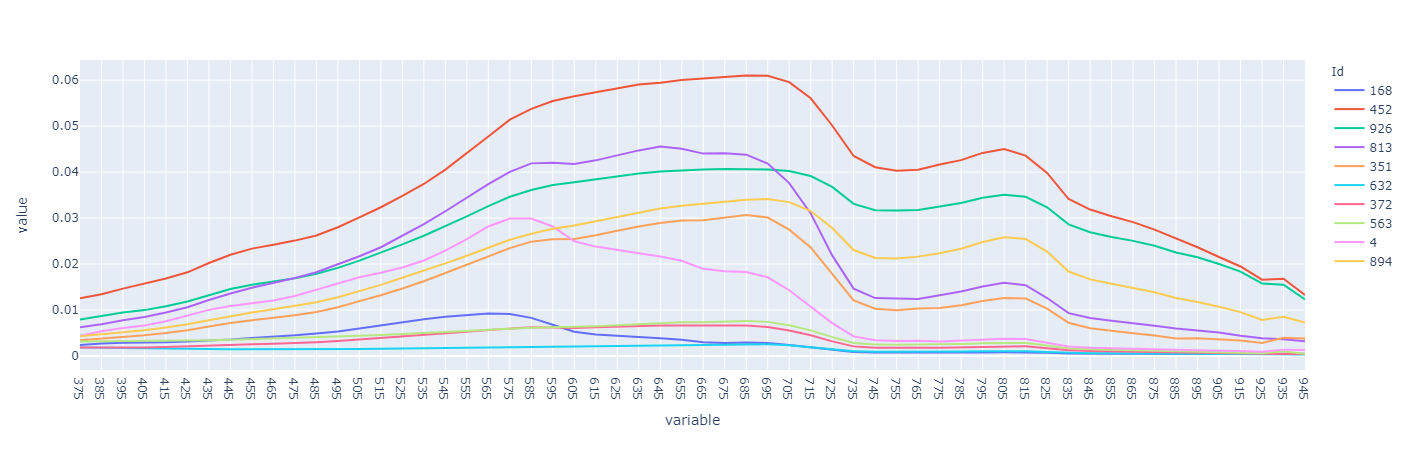

In [22]:
#copy the reflectances into the rrs dataframe
rrs = db.rdmtries['Rrs']

# define the wavelenghts to work with
bands = wavelength_range(375, 950, 10)
plot_ids(rrs, rrs.index[np.random.randint(0, len(rrs), 10)], bands=bands, )

## Mean Spectra by Area
In this section we will plot the mean spectra by Area

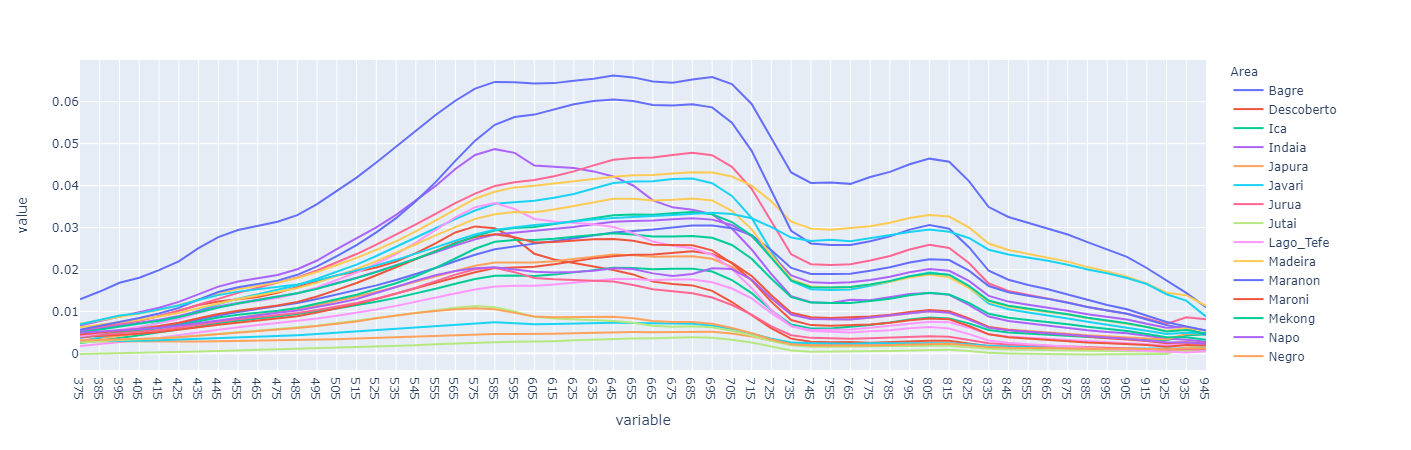

In [23]:
plot_mean_reflectances(rrs, group_by='Area', id_vars=['Area', 'SPM'], color='Area', bands=bands)

## Calculating SPM stats by Area
* only areas with more than 5 measurements will be included in the statistics
* measurements with no SPM measurements will be excluded

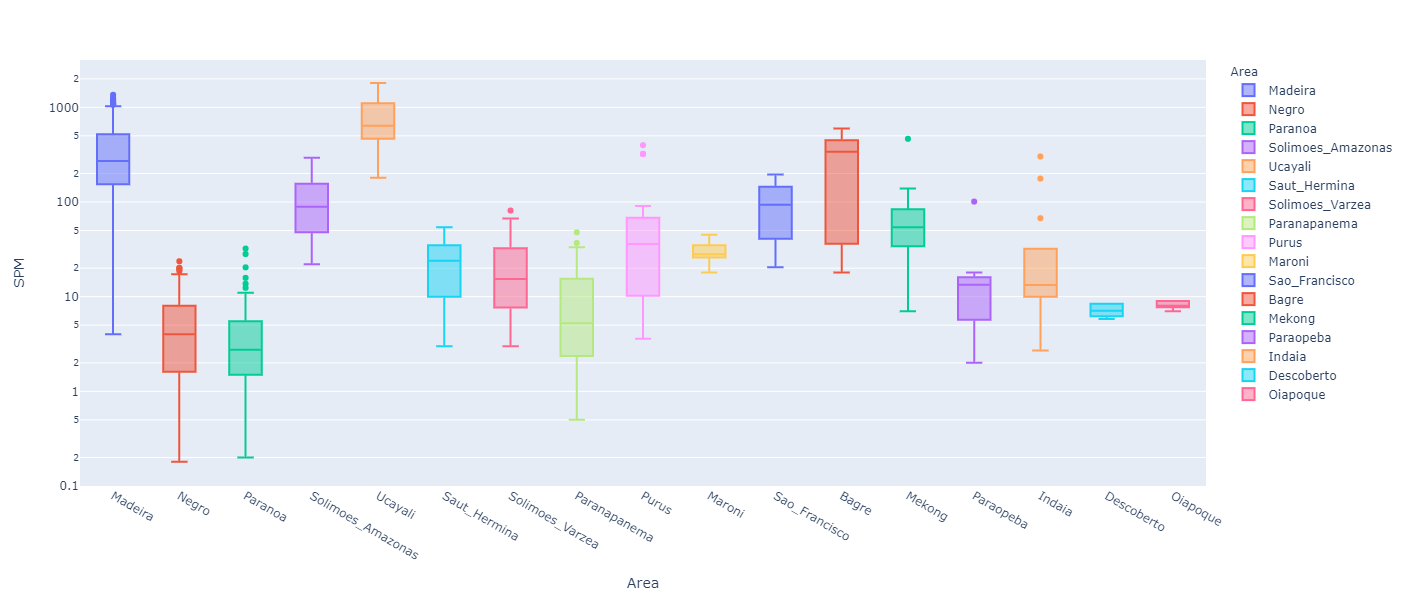

In [24]:
# Deleting 0 SPM measurements
rrs = rrs[(~pd.isna(rrs['SPM'])) & (rrs['SPM'] > 0)]

# calculating the stats of the database
stats = calc_df_grouped_stats(rrs[['SPM', 'Area']], 'Area', ['SPM'], ['mean', 'max', 'min', 'std'], 
                              [pd.core.groupby.generic.DataFrameGroupBy.mean,
                               pd.core.groupby.generic.DataFrameGroupBy.max,
                               pd.core.groupby.generic.DataFrameGroupBy.min,
                               pd.core.groupby.generic.DataFrameGroupBy.std
                              ]
                             )


summary = db.summary()
grouped_df = pd.concat([summary, stats], axis=1, sort=False)

# selecting basins with more than 5 SPM measurements
spm_df = rrs[rrs['Area'].isin(grouped_df[grouped_df['SPM']>=5].index)]

# Setting the same order of basins as the previous graph
category_orders = {'Area': list(grouped_df[grouped_df['SPM']>=5].index)}

fig = px.box(spm_df, x='Area', y='SPM', color='Area', 
             category_orders=category_orders, range_y=[0, 1700], height=600)

fig.update_yaxes(type='log', range=[-1, 3.5])
showfig(fig)

# Plotting Reflectance Scatters

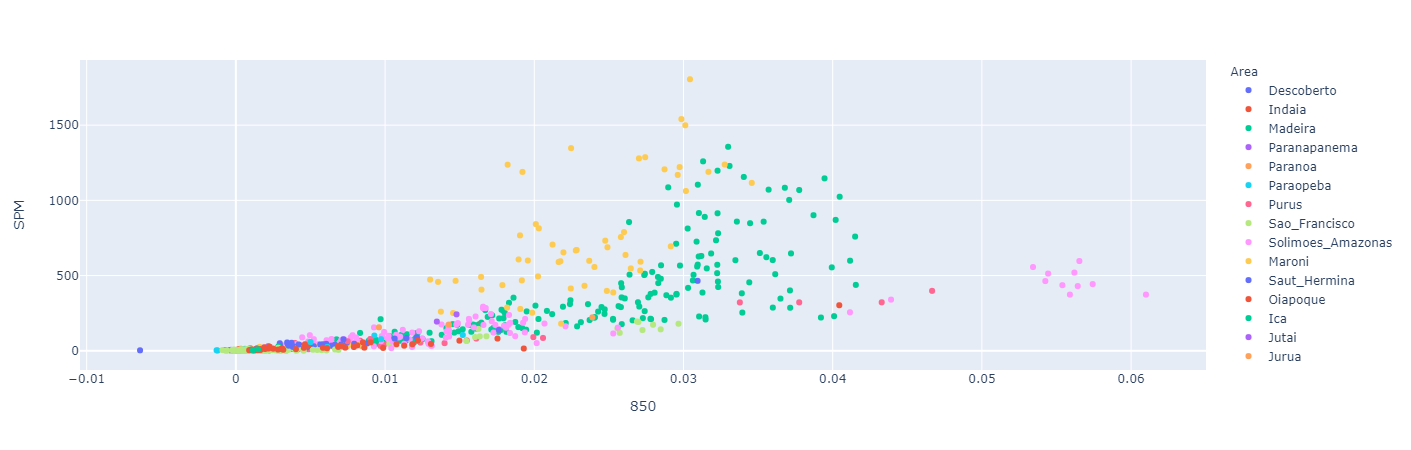

In [25]:
px.scatter(rrs, x='850', y='SPM', color='Area', log_y=False, hover_data=[rrs.index])

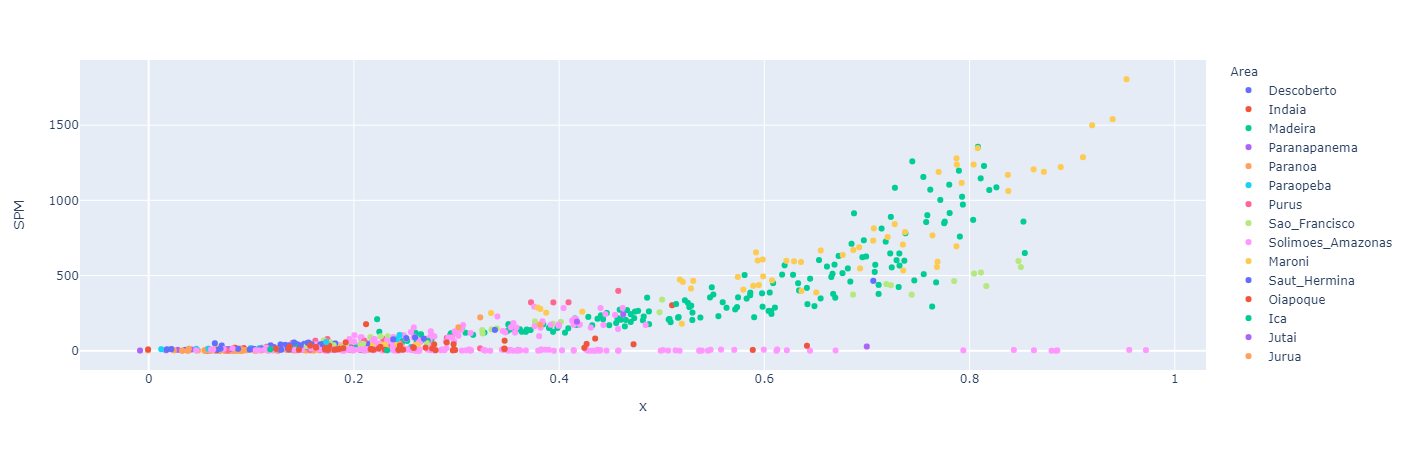

In [26]:
# the ratio 865/665 can solve part of the dispersion
# before that, we will clean negative reflectances
rrs = rrs[rrs['850']>0]
rrs = rrs[rrs['665']>0]
px.scatter(rrs, x=rrs['865']/rrs['665'], y='SPM', color='Area', log_y=False)

It's clear from the graph that low SPM concentrations are not corrected by using the 865/665 ratio

# Analysing the area (total brightness) of the reflectance

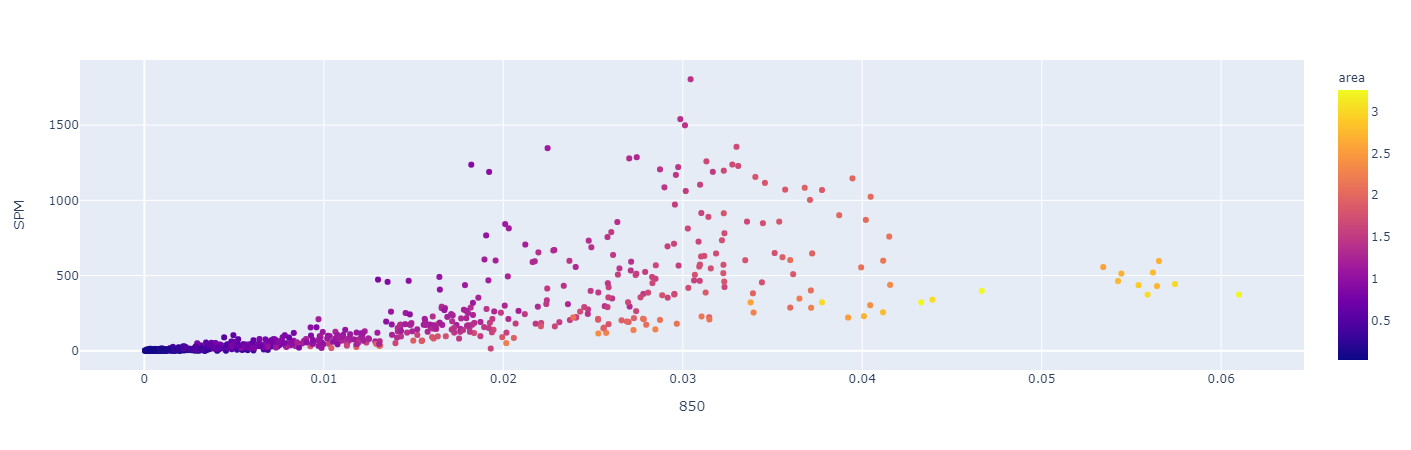

In [27]:
rrs = calc_area(rrs, bands=bands)
px.scatter(rrs, x='850', y='SPM', color='area', log_y=False)

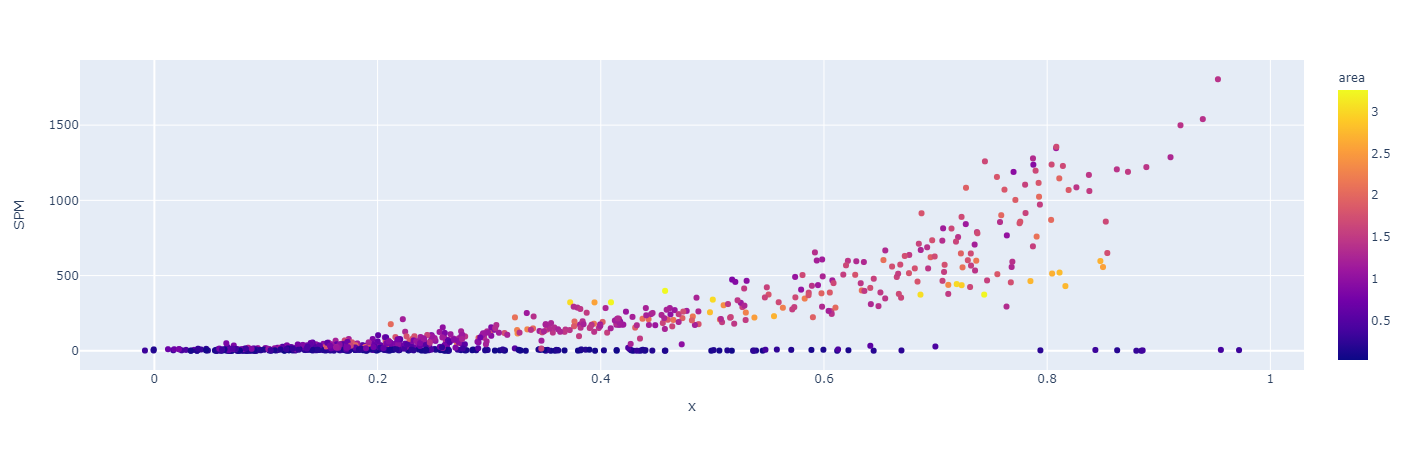

In [28]:
px.scatter(rrs, x=rrs['865']/rrs['665'], y='SPM', color='area', log_y=False)

In [29]:
rrs = calc_area(rrs, bands=bands, col_name='flatness', norm_band='700')

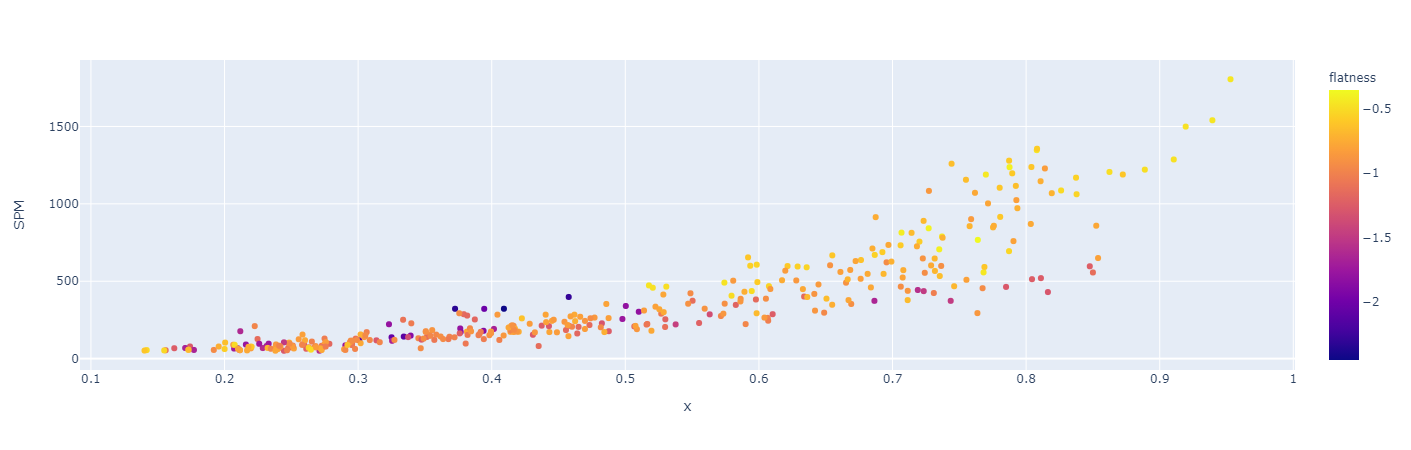

In [30]:
high_SPM = rrs[rrs['SPM']> 50] 
px.scatter(high_SPM, x=high_SPM['865']/high_SPM['665'], y='SPM', color='flatness', log_y=False)

## Plotting radiometries from an Area

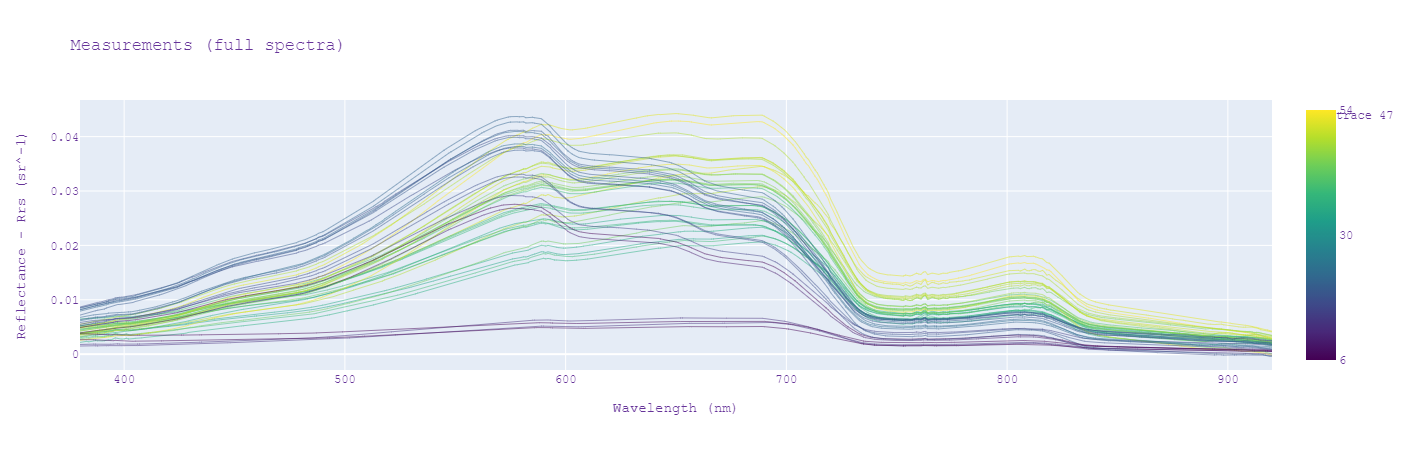

In [31]:
area = rrs[rrs['Area']=='Saut_Hermina']

plot_reflectances2(area, all_wls, hover_vars=['Area', 'SPM'])

# Scratch Area

In [32]:
kd = db.kd.join(db.data, lsuffix='_kd').join(db.granulometry, rsuffix='_granul')

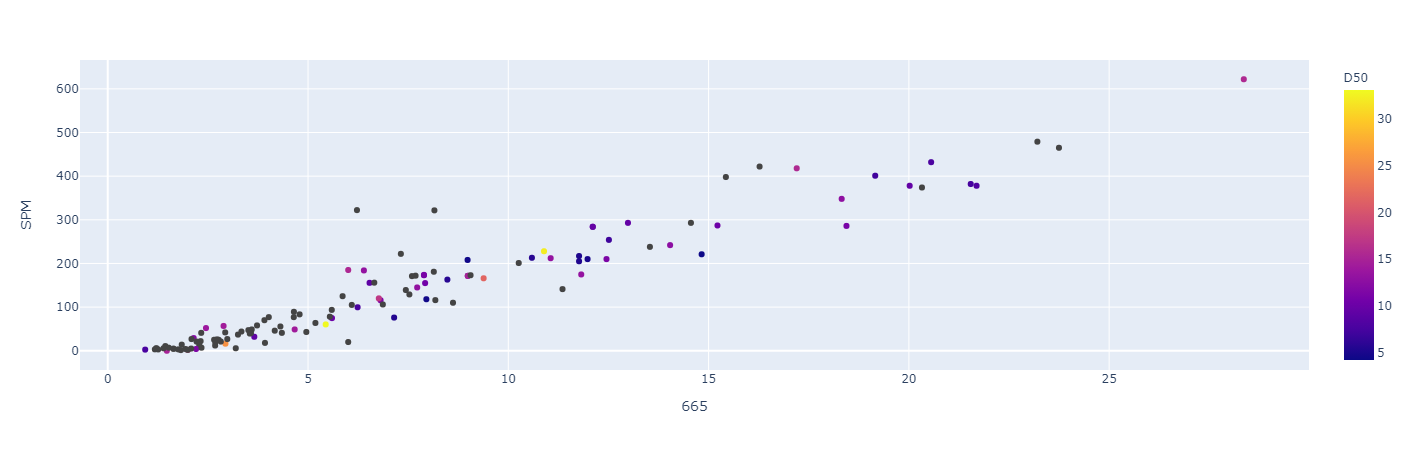

In [33]:
px.scatter(kd, x=665, y='SPM', color='D50')

In [34]:
db.granulometry

Station_Name    Measurement     SPM  Depth1  Depth2  \
Id                                                                           
400     Solimoes_Amazonas-Tabatinga  20140402-1200  171.60     0.0     0.0   
401     Solimoes_Amazonas-Tabatinga  20140402-1242  171.60     0.0     0.0   
402        Solimoes_Amazonas-BC_SPO  20140403-1044  155.60     0.0     0.0   
403  Solimoes_Amazonas-Montante_ica  20140404-1152  284.00     0.0     0.0   
404  Solimoes_Amazonas-Montante_ica  20140404-1223  284.00     0.0     0.0   
..                              ...            ...     ...     ...     ...   
916                    Madeira-Beni  20210422-1424  603.00     NaN     NaN   
919                 Madeira-Estacao  20210423-1138  630.27     NaN     NaN   
922                   Madeira-Jirau  20210423-1222  734.53     NaN     NaN   
925              Madeira-Pederneira  20210424-1144  369.20     NaN     NaN   
928               Madeira-Tamborete  20210424-1250  354.67     NaN     NaN   

          D10       D20       D30        D40        D50        D60        D70  \
Id                                                                              
400  2.079225  3.785497  5.664949   7.854500  10.607627  14.359270  19.944678   
401  2.873362  5.438512  8.080886  11.103030  14.916754  20.263307  28.672662   
402  1.985985  3.622327  5.320074   7.127098   9.190615  11.713967  15.106009   
403  1.995668  3.608300  5.344303   7.284229   9.622868  12.685683  17.113086   
404  1.995668  3.608300  5.344303   7.284229   9.622868  12.685683  17.113086   
..        ...       ...       ...        ...        ...        ...        ...   
916  1.130062  2.086630  3.169888   4.503256   6.209500   8.466902  11.519699   
919  1.289490  2.497790  3.891783   5.698395   8.097190  11.300177  15.649173   
922  1.335330  2.584811  4.057641   5.976548   8.538080  11.928566  16.480745   
925  1.123055  2.088237  3.141512   4.421687   6.043101   8.172394  11.022834   
928  1.126447  2.154976  3.270940   4.648554   6.414817   8.732572  11.888272   

           D80        D90         D95      %Fins  %Grossiers  \
Id                                                             
400  29.618302  50.430596   76.932793        NaN         NaN   
401  43.355408  73.590053  107.791890  87.401714   12.598286   
402  20.471472  31.590085   44.917830  97.944041    2.055959   
403  24.734630  41.954115   65.030070  94.725753    5.274247   
404  24.734630  41.954115   65.030070  94.725753    5.274247   
..         ...        ...         ...        ...         ...   
916  15.907444  23.781720   32.745631        NaN         NaN   
919  22.271130  35.676159   51.305918        NaN         NaN   
922  23.435913  37.075455   52.590000        NaN         NaN   
925  15.031406  22.164611   29.979000        NaN         NaN   
928  16.405664  24.916908   35.052632        NaN         NaN   

                                    Obs  
Id                                       
400  Two diff measurements for this day  
401                                 NaN  
402                                 NaN  
403                                 NaN  
404                                 NaN  
..                                  ...  
916                                 NaN  
919                                 NaN  
922                                 NaN  
925                                 NaN  
928                                 NaN  

[124 rows x 18 columns]